<a href="https://colab.research.google.com/github/Startup-Data/SatLunNeh/blob/master/Doing%2520Tasks/Trashes/Docker_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Python and TensorFlow for SEO**

Search Engine Optimization is a hard game. Google is the big player and the algorithm they use to rank a website for any given search term is a closely guarded secret. SEO optimization is a multi-billion dollar game, there are numerous companies out there providing services to millions of business to give them a competitive advantage in the SERPs to beat their competition and obtain more client.

Websites such as [algoroo.com](https://algoroo.com) can track Google SERP changes and indicate whether Google has updated their ranking algorithm with at least some accuracy. There is an enormous amount of data to go through to break down why certain websites have gained or lost rank but with TensorFlow, it's possible to sift through the data and find patterns.

We can take this one step further and determine why certain websites have gained or lost rankings for certain terms. Through Machine Learning we can as accurately as possible determine which on-page and off page SEO tactics are working to rank any website for a given term. Also, we can quickly learn and adapt once a new algorithm change hits the SERPs.

Recently I stumbled upon an agency specializing in SEO in Sydney called [Pixel Marketing](https://pxm.com.au). They have a very intriguing SEO optimization tool you can view here [https://pxm.com.au/seo-analyzer/](https://pxm.com.au/seo-analyzer/). After running through a couple websites you can see just how enormous the data collected just to analyze one website is.

If we scale a tool like this and use it to track the top 100 results in Google for the most searched keywords, store and collect all the on and off page data for each website, then use TensorFlow to find the similarities between the websites which have gained rank and lost rank we can have a competitive advantage to the competition.

Let's assume all the data that is stored by a tool like this is in a MySQL database. Firstly let's install a Python and TensorFlow environment on a VPS so that it can quietly churn away finding the patterns from our dataset. We will also use [Docker](https://www.docker.com/why-docker) for portability.

## Installing Docker, Python 3 and TensorFlow

We will be running a linux machine, you can use any provider but for this tutorial we will be using Digital Ocean. For testing purposes we can just use a simple $5 per month [droplet](https://www.digitalocean.com/pricing/). We will be using the Ubuntu image from the droplet management panel.

Once the droplet has spun up with our Ubuntu image we will SSH into it to install the required packages. First we will intall Docker so we can download the pre installed PIP and python container. We are using Ubuntu 18.04 in this example.

First lets update all the packages to the latest ones with the following command.

In [1]:
!sudo apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,428 kB]
Hit:14 http://ppa.launchpad.net/cran/libgit2/ubuntu bio

Now we want to install some  prerequisite packages which will let us use HTTPS over apt.

In [2]:
!sudo apt install apt-transport-https ca-certificates curl software-properties-common

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.14).
The following additional packages will be installed:
  libcurl4 libcurl4-openssl-dev
Suggested packages:
  libcurl4-doc libidn11-dev libkrb5-dev libldap2-dev librtmp-dev
The following NEW packages will be installed:
  apt-transport-https
The following packages will be upgraded:
  ca-certificates curl libcurl4 libcurl4-openssl-dev
4 upgraded, 1 newly installed, 0 to remove and 75 not upgraded.
Need to get 830 kB of archives.
After this operation, 156 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 ca-certificates all 20210119~18.04.2 [145 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 apt-transport-https all 1.6.14 [4,348 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcurl4-openssl-dev amd64 7.58.0-2ubuntu3.16 [3

After that we will add the GPG key for the official Docker repository to the system.

In [3]:
!curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo apt-key add -

OK


We will need to add the Docker repository to our APT sources:

In [4]:
!sudo add-apt-repository "deb [arch=amd64] https://download.docker.com/linux/ubuntu bionic stable"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 https://download.docker.com/linux/ubuntu bionic InRelease [64.4 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://download.docker.com/linux/ubuntu bionic/stable amd64 Packages [22.4 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/cran/libgit2/

Next lets update the package database with our newly added Docker package repo.

In [5]:
!sudo apt update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://download.docker.com/linux/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:15 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hi

Finally lets install docker with the below command:

In [6]:
!sudo apt install docker-ce

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  apparmor containerd.io docker-ce-cli docker-ce-rootless-extras
  docker-scan-plugin iptables libip6tc0 libiptc0 libmnl0
  libnetfilter-conntrack3 libnfnetlink0 libxtables12 pigz
Suggested packages:
  apparmor-profiles-extra apparmor-utils aufs-tools cgroupfs-mount
  | cgroup-lite
Recommended packages:
  slirp4netns
The following NEW packages will be installed:
  apparmor containerd.io docker-ce docker-ce-cli docker-ce-rootless-extras
  docker-scan-plugin iptables libip6tc0 libiptc0 libmnl0
  libnetfilter-conntrack3 libnfnetlink0 libxtables12 pigz
0 upgraded, 14 newly installed, 0 to remove and 75 not upgraded.
Need to get 97.5 MB of archives.
After this operation, 410 MB of additional disk space will be used.
Get:1 https://download.docker.com/linux/ubuntu bionic/stable amd64 containerd.io amd64 1.4.9-1 [24.7 MB]
Get:2 http://archive.ubun

Now lets check that docker is running. 

In [7]:
! sudo systemctl status docker

System has not been booted with systemd as init system (PID 1). Can't operate.


The output from the command should look similar to the one below

In [8]:
# Output
# ● docker.service - Docker Application Container Engine
#    Loaded: loaded (/lib/systemd/system/docker.service; enabled; vendor preset: enabled)
#    Active: active (running) since Tue 2019-01-01 19:22:114 UTC; 1min 25s ago
#      Docs: https://docs.docker.com
#  Main PID: 10096 (dockerd)
#     Tasks: 16
#    CGroup: /system.slice/docker.service
#            ├─10096 /usr/bin/dockerd -H fd://
#            └─10113 docker-containerd --config /var/run/docker/containerd/containerd.toml

Once we have verified everything is installed and running correctly we can simply run the following command to install the TensorFlow Docker image:

In [9]:
! docker run -it -p 8888:8888 gcr.io/tensorflow/tensorflow

docker: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?.
See 'docker run --help'.


In [10]:
!docker run -d --restart=always -p 80:80 -v /content/:/app/db --name googlemusic-dedup jaymoulin/google-musicmanager-dedup-api


docker: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?.
See 'docker run --help'.


# New Tries:

In [22]:
# https://askubuntu.com/questions/1180060/getting-error-while-installing-docker-docker-ce-depends-containerd-io-1
! sudo apt-get update
! sudo apt-get install \
  apt-transport-https \
  ca-certificates \
  curl \
  gnupg-agent \
  software-properties-common
!curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo apt-key add -
!sudo add-apt-repository \
 "deb [arch=amd64] https://download.docker.com/linux/ubuntu \
 $(lsb_release -cs) \
 stable"


Hit:1 https://download.docker.com/linux/ubuntu bionic InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic In

In [39]:
# https://stackoverflow.com/questions/21871479/docker-cant-connect-to-docker-daemon
!sudo bash -c 'install -vm755 <(curl -L https://github.com/docker/machine/releases/download/v0.5.3/docker-machine_linux-amd64) /usr/local/bin/docker-machine'
# !sudo docker -d --storage-opt dm.basesize=20G
# !sudo apt install brew -y
# !brew services start docker-machine


removed '/usr/local/bin/docker-machine'
'/dev/fd/63' -> '/usr/local/bin/docker-machine'
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   632  100   632    0     0   3674      0 --:--:-- --:--:-- --:--:--  3674
100 14.1M  100 14.1M    0     0  23.9M      0 --:--:-- --:--:-- --:--:-- 34.8M
# Executing docker install script, commit: 93d2499759296ac1f9c510605fef85052a2c32be

If you already have Docker installed, this script can cause trouble, which is
why we're displaying this warning and provide the opportunity to cancel the
installation.

If you installed the current Docker package using this script and are using it
again to update Docker, you can safely ignore this message.

You may press Ctrl+C now to abort this script.
+ sleep 20
+ sh -c apt-get update -qq >/dev/null
+ sh -c DEBIAN_FRONTEND=noninteractive apt-get install -y -qq apt-transport-https ca-certificates curl >/d

In [44]:
!curl -fsSL https://get.docker.com -o get-docker.sh
!sudo chmod 755 ./get-docker.sh
# !sudo ./get-docker.sh
!curl -fsSL https://get.docker.com/rootless -o dockerd-rootless-setuptool.sh

! dockerd-rootless-setuptool.sh install
# https://twtr.to/rPH5

[ERROR] Refusing to install rootless Docker as the root user


In [29]:
# https://stackoverflow.com/questions/44678725/cannot-connect-to-the-docker-daemon-at-unix-var-run-docker-sock-is-the-docker
# !sudo groupadd docker
# !sudo usermod -aG docker $(whoami)
# !sudo service docker start
# !sudo apt instlal snapd -y
# !sudo snap start docker



groupadd: group 'docker' already exists
 * Starting Docker: docker
   ...done.
E: Invalid operation instlal
sudo: snap: command not found


In [25]:
!lsb_release -a
!apt-get install containerd=1.2.6-0ubuntu1
!apt-get install docker.io
!docker --version
# Docker version 18.09.5, build e8ff056
!docker ps

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Version '1.2.6-0ubuntu1' for 'containerd' was not found
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Some packages could not be installed. This may mean that you have
requested an impossible situation or if you are using the unstable
distribution that some required packages have not yet been created
or been moved out of Incoming.
The following information may help to resolve the situation:

The following packages have unmet dependencies:
 docker.io : Depends: containerd (>= 1.2.6-0ubuntu1~)
E: Unable to correct problems, you have held broken packages.
Docker version 20.10.8, build 3967b7d
Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?


## https://stackoverflow.com/questions/44678725/cannot-connect-to-the-docker-daemon-at-unix-var-run-docker-sock-is-the-docker
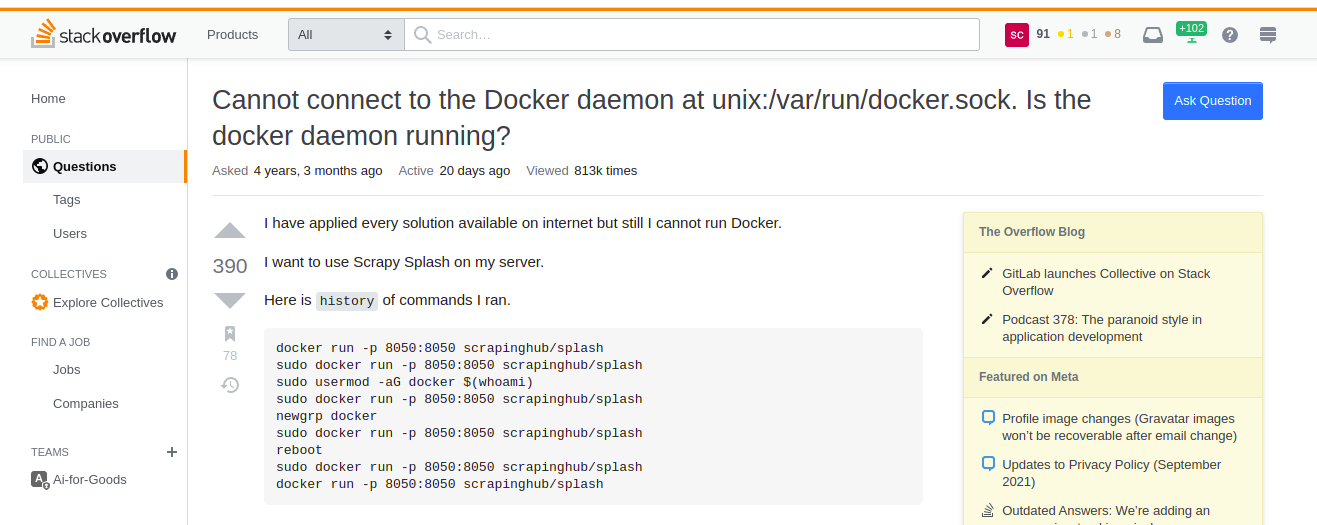

In [11]:
# !sudo apt-get install apt-transport-https ca-certificates curl gnupg-agent software-properties-common

# !curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo apt-key add -


# !sudo apt-key fingerprint 0EBFCD88


# !sudo apt-get update


# !sudo add-apt-repository "deb [arch = amd64] https://download.docker.com/linux/ubuntu $ (lsb_release -cs) stable "



# !sudo apt-get update



# !sudo apt-get install docker-ce = 5: 18.09.9 ~ 3-0 ~ ubuntu-bionic docker-ce-cli = 5: 18.09.9 ~ 3-0 ~ ubuntu-bionic containerd.io


# !export DOCKER_HOST="tcp://0.0.0.0:2375"


# !sudo usermod -aG docker $USER

# !source ~/.bashrc


# !docker run hello-world


Reading package lists... Done
Building dependency tree       
Reading state information... Done
ca-certificates is already the newest version (20210119~18.04.2).
curl is already the newest version (7.58.0-2ubuntu3.16).
software-properties-common is already the newest version (0.96.24.32.14).
apt-transport-https is already the newest version (1.6.14).
The following NEW packages will be installed:
  gnupg-agent
0 upgraded, 1 newly installed, 0 to remove and 75 not upgraded.
Need to get 4,864 B of archives.
After this operation, 43.0 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 gnupg-agent all 2.2.4-1ubuntu1.4 [4,864 B]
Fetched 4,864 B in 0s (17.1 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable t

Once installed we can move onto the next step.